<a href="https://colab.research.google.com/github/tomas-pinheiro/tomas-pinheiro/blob/main/Projeto4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
# Modelagem e Matrizes 
import numpy as np
import pandas as pd
# Análises Gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [154]:
df = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

In [155]:
df.shape

(1034, 9)

In [156]:
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [157]:
df.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

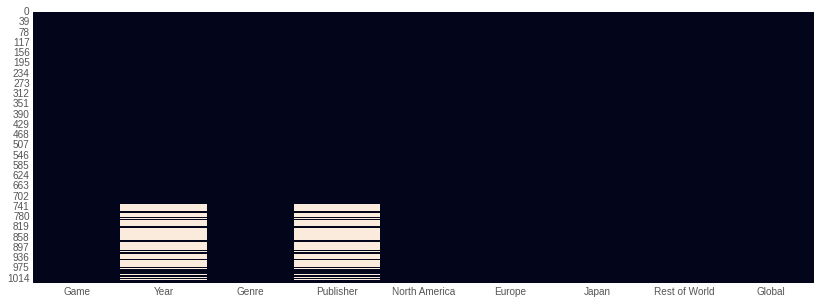

In [158]:
plt.figure(figsize=(14,5))
sns.heatmap(df.isnull(), cbar=False);


In [159]:
# Retirando nulos e alterando base de dados origem
df.dropna( inplace=True)

In [160]:
df.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


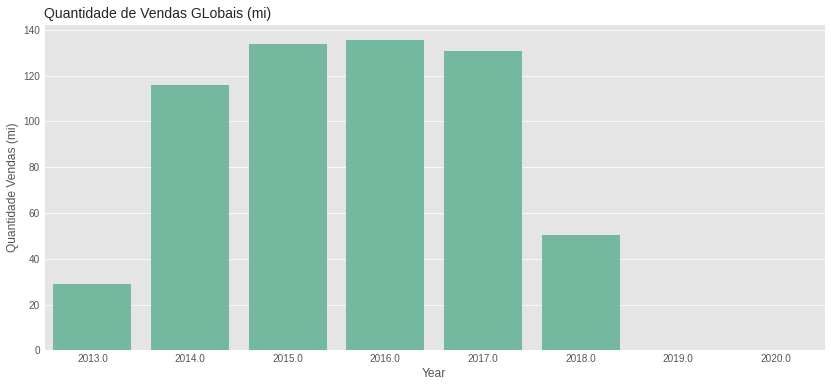

In [161]:
plt.figure(figsize=(14,6))
plt.title('Quantidade de Vendas GLobais (mi)', loc='left', fontsize=14)
sns.barplot(data=df, x='Year', y='Global', ci=None, color='#69c3a2', estimator=sum); #caso não passe valor do estimator, por definicção, sum=mean
plt.ylabel('Quantidade Vendas (mi)');


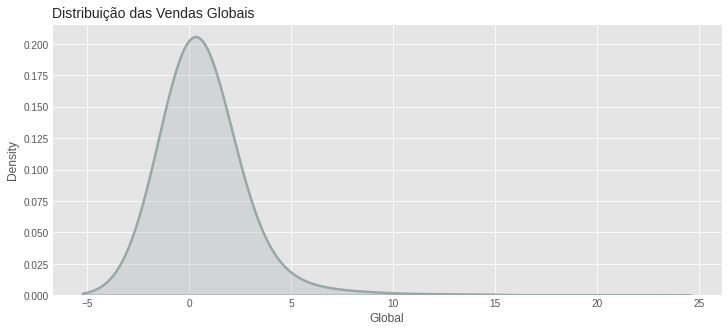

In [162]:
plt.figure( figsize=(12,5) )

# Estilo
plt.style.use('ggplot');

plt.title('Distribuição das Vendas Globais', loc='left', fontsize=14);

sns.kdeplot( df['Global'], shade=True, bw=1, color='#96a8a8', linewidth=2.5 );

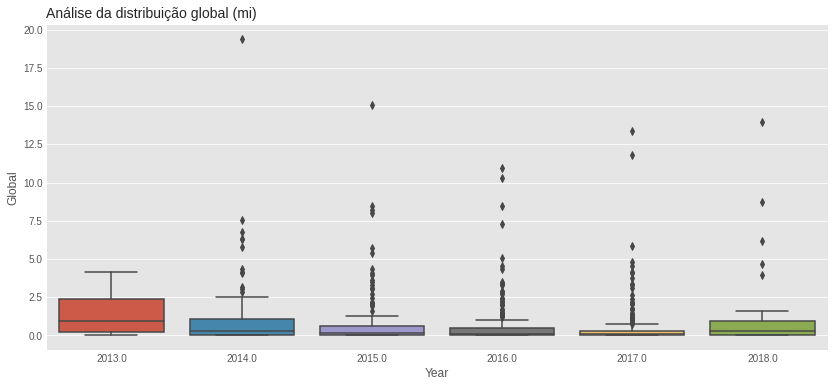

In [163]:
# Excluindo os anos vazios

df_filtered = df.loc[~df['Year'].isin([2019, 2020])]
df_filtered['Year'].unique()


plt.figure (figsize=(14,6))
plt.title('Análise da distribuição global (mi)', size=14, loc='left')
sns.boxplot(data=df_filtered, x='Year', y='Global');

In [164]:
Analise = df_filtered.groupby( by=['Year' ] ).sum().reset_index()

In [165]:
America = [ America / Total * 100 for America, Total in zip ( Analise['North America'], Analise['Global'])]
Europa = [ Europa / Total * 100 for Europa, Total in zip( Analise['Europe'], Analise['Global'] ) ]
Japao = [ Japao / Total * 100 for Japao, Total in zip( Analise['Japan'], Analise['Global'] ) ]
Mundo = [ Mundo / Total * 100 for Mundo, Total in zip( Analise['Rest of World'], Analise['Global'] ) ]

In [166]:
America, Europa, Japao, Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

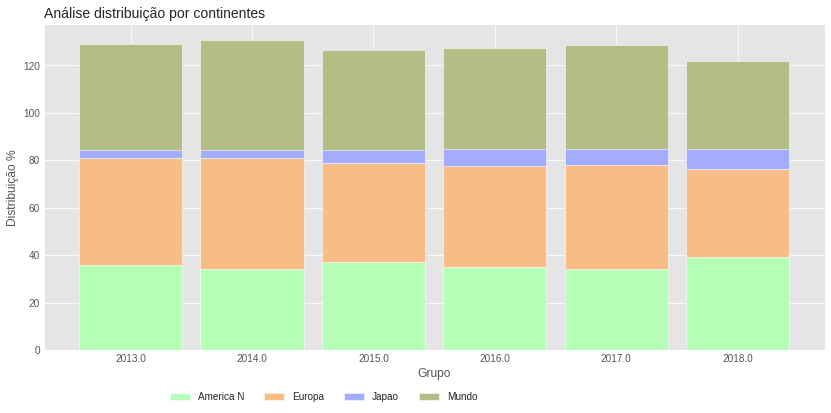

In [167]:
plt.figure (figsize=(14,6))

# Gráfico de Barras empilhadas

Largura_Barra = 0.85
Rotulos = Analise['Year']
Grupos = [0, 1, 2, 3, 4, 5]
plt.title('Análise distribuição por continentes', size=14, loc='left')

# Plot America
plt.bar(Grupos, America, width=Largura_Barra, color='#b5ffb9', edgecolor='white')

# Plot Europa
plt.bar(Grupos, Europa,bottom = America, width=Largura_Barra, color='#f9bc86', edgecolor='white')

# Plot Europa
plt.bar(Grupos, Europa,bottom = [ A+B for A,B in zip(America, Europa)], width=Largura_Barra, color='#a3acff', edgecolor='white')

# Plot Outros
plt.bar(Grupos, Europa,bottom = [ A+B+C for A,B,C in zip(America, Europa, Japao)], width=Largura_Barra, color='#b3bd86', edgecolor='white')


plt.xticks(Grupos, Rotulos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

plt. legend(['America N', 'Europa', 'Japao', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4);



In [168]:
df_filtered['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [169]:
# Conversão do valor categórico para o valor numérico
from sklearn.preprocessing import LabelEncoder
Funcao_Label = LabelEncoder()

df_filtered['Produtor'] = Funcao_Label.fit_transform( df_filtered['Publisher'])
df_filtered['Genero'] = Funcao_Label.fit_transform( df_filtered['Genre'])
df_filtered['Jogo'] = Funcao_Label.fit_transform( df_filtered['Game'])


df_filtered.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [182]:
paleta_cores = sns.color_palette('Dark2_r', 8)
paleta_cores

[(0.4, 0.4, 0.4),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.10588235294117647, 0.6196078431372549, 0.4666666666666667)]

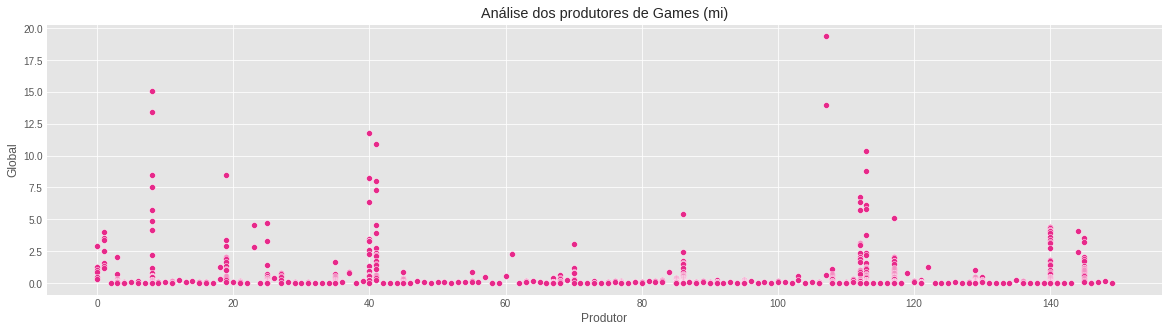

In [189]:
plt.figure(figsize=(20,5))
plt.title('Análise dos produtores de Games (mi)')
sns.scatterplot(data=df_filtered, x='Produtor', y='Global', color = paleta_cores[4]);

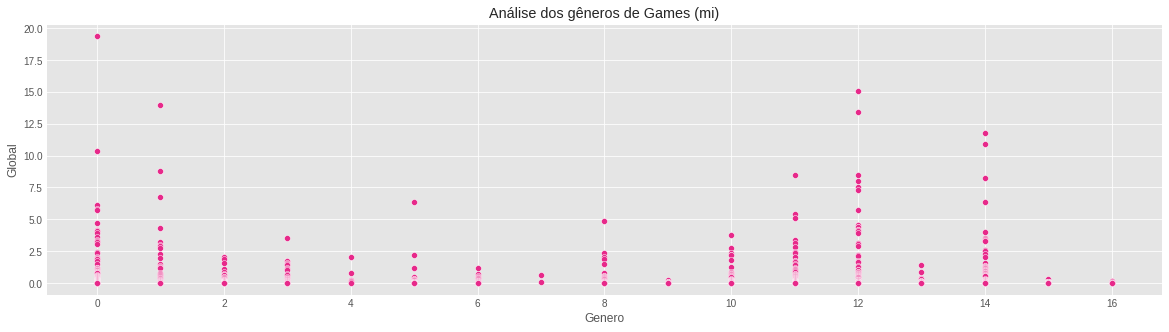

In [191]:
plt.figure(figsize=(20,5))
plt.title('Análise dos gêneros de Games (mi)')
sns.scatterplot(data=df_filtered, x='Genero', y='Global', color = paleta_cores[4]);

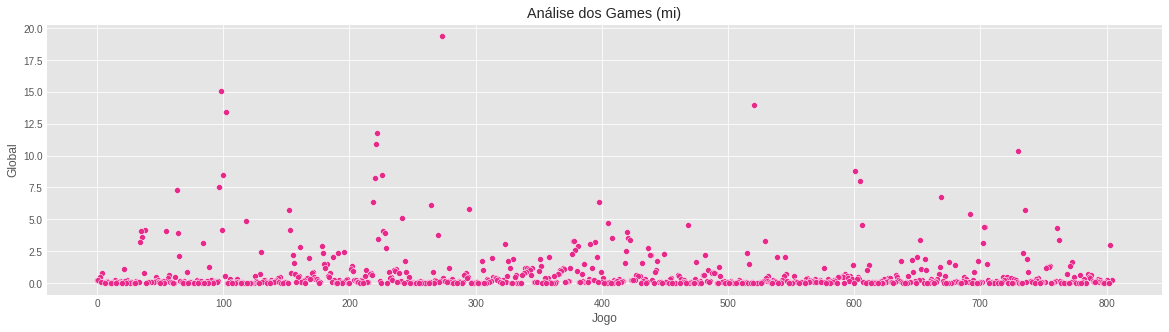

In [192]:
plt.figure(figsize=(20,5))
plt.title('Análise dos Games (mi)')
sns.scatterplot(data=df_filtered, x='Jogo', y='Global', color = paleta_cores[4]);